# Figure Report Generation

In another notebook we assigned businesses to one of the ten metro areas and screened out businesses that didn't seem to belong to any of those metros.  This now sits in a nice JSON file bus_metro2.json.

[Fig. Locations by supercategory.  Locations by type of Restaurants .  Pizza by Metro.]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json
import numpy as np
import pandas as pd

In [2]:
with open("bus_metro2.json", "rt") as infile:
    dfb = pd.read_json(infile)

In [3]:
dfb

,attributes,categories,city,full_address,hours,latitude,longitude,metro,name,neighborhoods,open,review_count,stars,state,type
--0ZoBTQWQra1FxD4rBWmg,{'Accepts Credit Cards': False},"[Property Management, Home Services, Real Estate]",Phoenix,"2920 E Camelback Rd\nSte100\nPhoenix, AZ 85016","{'Thursday': {'open': '09:00', 'close': '17:00...",33.510773,-112.018737,Phoenix,Bourquin Residential Group,[],True,4,2.0,AZ,business
--1emggGHgoG6ipd_RMb-g,"{'Price Range': 1, 'Accepts Credit Cards': Tru...","[Food, Convenience Stores]",Las Vegas,"3280 S Decatur Blvd\nWestside\nLas Vegas, NV 8...",{},36.130531,-115.207238,Las Vegas,Sinclair,[Westside],True,4,4.0,NV,business
--4Pe8BZ6gj57VFL5mUE8g,"{'Price Range': 3, 'Accepts Credit Cards': Tru...","[Shopping, Office Equipment]",Phoenix,"21001 North Tatum Blvd. #24\nPhoenix, AZ 85050",{},33.676354,-111.973651,Phoenix,Office Max,[],True,9,3.0,AZ,business
--5jkZ3-nUPZxUvtcbr8Uw,"{'Alcohol': 'none', 'Price Range': 1, 'Wi-Fi':...","[Greek, Vegetarian, Mediterranean, Restaurants]",Scottsdale,"1336 N Scottsdale Rd\nScottsdale, AZ 85257","{'Saturday': {'open': '11:00', 'close': '21:00...",33.463373,-111.926908,Phoenix,Mika's Greek,[],True,127,4.5,AZ,business
--7PRjnsjMA6uhPK8mW13Q,{},"[Bars, Nightlife]",Pittsburgh,"3160 Library Rd\nPittsburgh, PA 15234",{},40.371878,-80.008930,Pittsburgh,Castle Tavern,[],True,3,2.5,PA,business
--AKjxBmhm9DWrh-e0hTOw,"{'Good for Kids': True, 'Good For Groups': Tru...","[Restaurants, Italian]",Laval,"993 Boulevard Saint-Martin Ouest\nLaval, QC H7...","{'Sunday': {'open': '16:00', 'close': '22:00'}...",45.572509,-73.720293,Montreal,Grigio,[],True,6,4.5,QC,business
--BlvDO_RG2yElKu9XA1_g,"{'Alcohol': 'none', 'Price Range': 1, 'Wi-Fi':...","[Sushi Bars, Hawaiian, Chinese, Restaurants]",Scottsdale,"14870 N Northsight Blvd\nSte 103\nScottsdale, ...","{'Sunday': {'open': '12:00', 'close': '21:00'}...",33.621605,-111.899066,Phoenix,Asian Island,[],True,122,4.0,AZ,business
--Dl2rW_xO8GuYBomlg9zw,{'By Appointment Only': True},"[Medical Centers, Health & Medical]",Las Vegas,"4505 S Maryland Pkwy\nUniversity\nLas Vegas, N...",{},36.110940,-115.141514,Las Vegas,UNLV Student Health Center,[University],True,7,4.5,NV,business
--LzU4UT9rysIDXbhoWHiQ,"{'Price Range': 3, 'Accepts Credit Cards': Tru...","[Hair Salons, Day Spas, Nail Salons, Beauty & ...",Pittsburgh,"99 S 10th St\nSouth Side\nPittsburgh, PA 15203","{'Wednesday': {'open': '11:00', 'close': '20:0...",40.427499,-79.988313,Pittsburgh,Lunasea Salon+Day Spa,[South Side],True,10,4.5,PA,business
--NCcmQqh_NZbjW1S5XsGQ,"{'Price Range': 2, 'Parking': {'validated': Fa...","[Bakeries, Food, Desserts]",Montréal,"291 Beaudoin Street\nSud-Ouest\nMontréal, QC H...","{'Thursday': {'open': '08:00', 'close': '18:00...",45.474274,-73.585614,Montreal,Sweet Lee's Rustic Bakery,[Sud-Ouest],False,5,4.5,QC,business


The categories data is set up so that a business can be in multiple categories.  Let's start by just getting a simple list to see what categories exist and how often each category occurs.

In [4]:
uniq_cats = dict()
cat_counts = list()
for cat_list in dfb.categories:
    cat_counts.append(len(cat_list))
    for item in cat_list:
        uniq_cats[item] = uniq_cats.get(item, 0) + 1
uc = pd.Series(uniq_cats)
uc.sort_values(ascending = False)

Restaurants                  26727
Shopping                     12444
Food                         10143
Beauty & Spas                 7490
Health & Medical              6106
Home Services                 5865
Nightlife                     5507
Automotive                    4887
Bars                          4727
Local Services                4040
Active Life                   3455
Fashion                       3395
Event Planning & Services     3236
Fast Food                     3153
Pizza                         2881
Mexican                       2705
Hotels & Travel               2673
Sandwiches                    2665
American (Traditional)        2608
Arts & Entertainment          2447
Hair Salons                   2436
Coffee & Tea                  2399
Doctors                       2061
Burgers                       1960
Italian                       1939
Auto Repair                   1907
Home & Garden                 1904
Nail Salons                   1889
Chinese             

In [5]:
uc.describe()

count     1017.000000
mean       251.400197
std       1140.576004
min          1.000000
25%          7.000000
50%         30.000000
75%        127.000000
max      26727.000000
dtype: float64

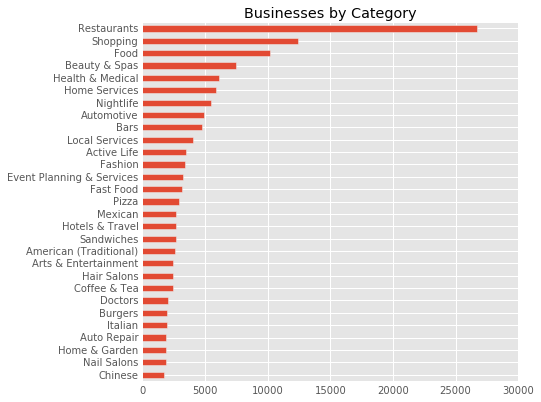

In [6]:
plt.style.use('ggplot')
uc[uc > 1700].sort_values().plot(kind = "barh", figsize = (6,6), title = "Businesses by Category")
plt.savefig('bus_cats.png')

In [7]:
with open("cat_explode.json", "rt") as infile:
    cf = pd.read_json(infile)

In [8]:
cf

,business_id,category,metro
0,--0ZoBTQWQra1FxD4rBWmg,Property Management,Phoenix
1,--0ZoBTQWQra1FxD4rBWmg,Home Services,Phoenix
10,--5jkZ3-nUPZxUvtcbr8Uw,Restaurants,Phoenix
100,-0ZDRoepf3gwd9fpsw1bRQ,Education,Charlotte
1000,-EQhfCfuLM4NvR8emDJ8Tg,Home Services,Phoenix
10000,1PSnPPFVfp03iPfJRPWWQw,Japanese,Charlotte
100000,NsTuz5c3se7S4U-fB_ZKhw,Screen Printing,Phoenix
100001,Ns_kCOfzUf0be2rOj1vEBA,Food,Phoenix
100002,Ns_kCOfzUf0be2rOj1vEBA,Financial Services,Phoenix
100003,Ns_kCOfzUf0be2rOj1vEBA,Convenience Stores,Phoenix


Now run some groupings to see how many of these we have, counting unique business ids only

In [9]:
cf.groupby("metro").business_id.nunique()

metro
Charlotte      7144
Edinburgh      3478
Karlsruhe      1072
Las Vegas     23520
Madison        3063
Montreal       5573
Phoenix       36385
Pittsburgh     4084
Urb-Champ       805
Waterloo        528
Name: business_id, dtype: int64

Can now look at counts of business by both category and metro

Create a crosstab of the category data to get counts of businesses per metro

In [10]:
cross = pd.crosstab(cf.category, cf.metro, margins = True)
cross[cross.All > 1000].head()

metro,Charlotte,Edinburgh,Karlsruhe,Las Vegas,Madison,Montreal,Phoenix,Pittsburgh,Urb-Champ,Waterloo,All
category,,,,,,,,,,,
Active Life,283,91,46,1017,145,132,1551,164,22,4,3455
American (New),223,10,0,401,97,2,745,172,21,0,1671
American (Traditional),330,29,5,648,186,57,1092,201,32,28,2608
Arts & Entertainment,205,158,36,951,88,141,683,162,16,7,2447
Auto Repair,159,4,8,541,80,5,1022,66,20,2,1907


Plot out crosstab to show business per metro area

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


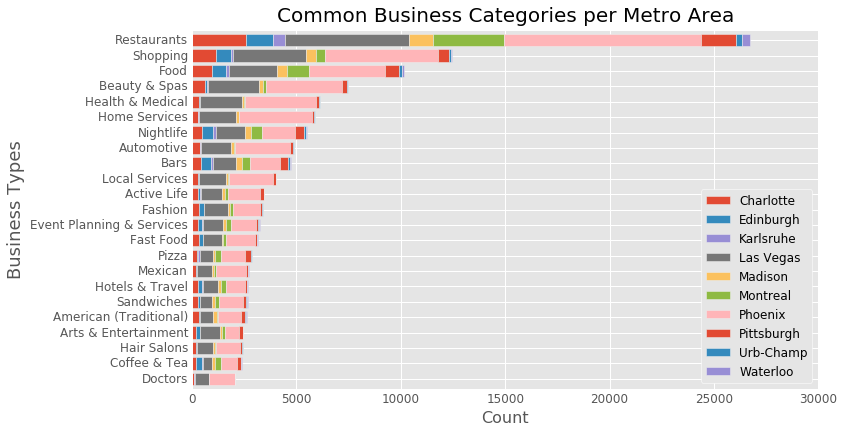

In [11]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Filter out categories with less than 2000 businesses, also remove totals line
cross2 = cross[cross.All>2000][cross.All != 255674].sort_values(['All'])

# Remove "All" from list of city values - plot all except "all"
ax = cross2[['Charlotte','Edinburgh', 'Karlsruhe','Las Vegas','Madison','Montreal','Phoenix','Pittsburgh','Urb-Champ',
             'Waterloo']].plot.barh(ax=ax, width=.8, stacked=True, figsize = (10, 6))

# Formatting
ax.legend(loc="lower right", fontsize=12)
plt.title("Common Business Categories per Metro Area",  y=1.01, size=20)
plt.xlabel("Count", size=16)
plt.ylabel("Business Types", size=18)

# Axis Sizes and format
plt.tick_params(labelsize=12)

Too cluttered. Do not use in report

Create a subcategory for pizza to produce stats for pizza restaurants only

In [12]:
pizza = dfb[dfb.categories.map(lambda x: "Pizza" in x)][dfb.open == True]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [13]:
pizza_cross2 = pd.crosstab(pizza.metro, pizza.stars, margins = False, normalize = 'index')
print(pizza_cross2)
#plt.style.use('ggplot')
#pizza_cross2.plot(kind = 'bar',figsize=(15,3), title = 'Distribution of Ratings of Pizzerias by Metro Areas', legend = 'upper right')


stars            1.0       1.5       2.0       2.5       3.0       3.5  \
metro                                                                    
Charlotte   0.025641  0.046154  0.035897  0.128205  0.138462  0.271795   
Edinburgh   0.000000  0.020833  0.000000  0.104167  0.083333  0.354167   
Karlsruhe   0.016129  0.016129  0.064516  0.064516  0.096774  0.290323   
Las Vegas   0.006593  0.039560  0.094505  0.189011  0.153846  0.243956   
Madison     0.000000  0.041667  0.083333  0.145833  0.197917  0.218750   
Montreal    0.008130  0.020325  0.048780  0.097561  0.162602  0.276423   
Phoenix     0.007795  0.025612  0.060134  0.120267  0.171492  0.239421   
Pittsburgh  0.004608  0.018433  0.041475  0.078341  0.161290  0.276498   
Urb-Champ   0.000000  0.000000  0.076923  0.038462  0.192308  0.384615   
Waterloo    0.000000  0.064516  0.064516  0.129032  0.193548  0.193548   

stars            4.0       4.5       5.0  
metro                                     
Charlotte   0.292308  0.0

<function matplotlib.pyplot.yticks>

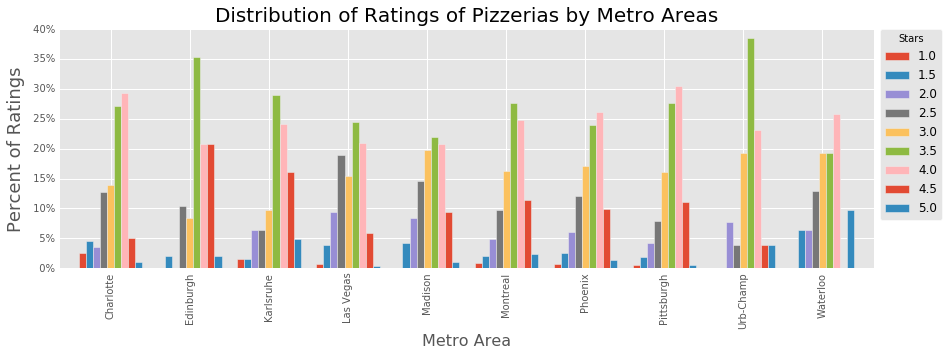

In [14]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (13,4))
ax = pizza_cross2.plot(ax = ax, kind = 'bar', width = 0.8)

# Formatting
ax.legend(bbox_to_anchor=(1.0, 1.025), loc = 'upper left', title = 'Stars')
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
plt.title('Distribution of Ratings of Pizzerias by Metro Areas',  y=1.01, size=20)
plt.xlabel("Metro Area", size=16)
plt.ylabel("Percent of Ratings", size=18)
plt.yticks